In [22]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("/Users/bera/Desktop/projects/lung-cancer-prediction/survey_lung_cancer.csv")



df.head()





,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Confusion Matrix:
[[ 1  1]
 [ 1 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


Top 10 Most Important Features:
                  Feature  Importance
12  SWALLOWING DIFFICULTY    1.049673
5         CHRONIC DISEASE    1.033680
6                FATIGUE     1.000343
10               COUGHING    0.982605
9       ALCOHOL CONSUMING    0.821580
2          YELLOW_FINGERS    0.659216
4           PEER_PRESSURE    0.623171
7                ALLERGY     0.614473
1                 SMOKING    0.602958
3                 ANXIETY    0.373709


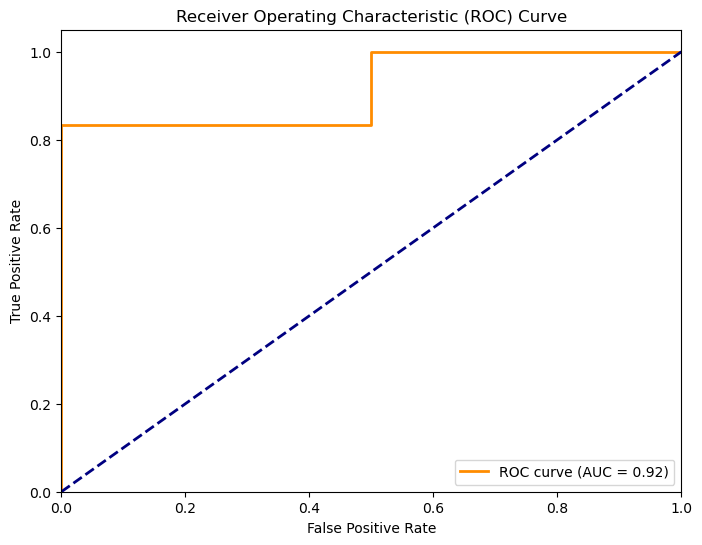

In [32]:
# ... existing code ...

# Create dummy variables for all categorical columns
X = pd.get_dummies(df.drop('LUNG_CANCER', axis=1), drop_first=True)

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['LUNG_CANCER'])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(logistic_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 0  2]
 [ 0 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      1.00      0.98        60

    accuracy                           0.97        62
   macro avg       0.48      0.50      0.49        62
weighted avg       0.94      0.97      0.95        62


Feature Importance:
          Feature  Importance
2   PEER_PRESSURE    0.567905
1  YELLOW_FINGERS    0.516115
3        GENDER_M    0.513185
0             AGE    0.237029


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


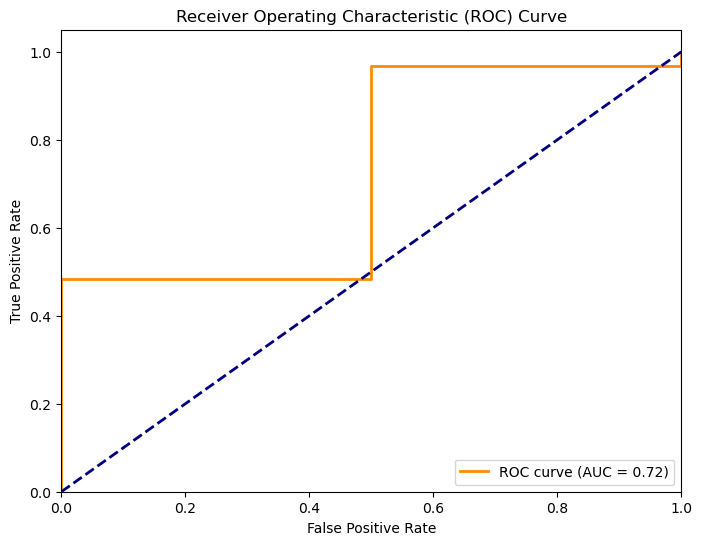

In [33]:
# ... existing code ...

# Select specific columns for the model
selected_columns = ['AGE', 'YELLOW_FINGERS', 'PEER_PRESSURE', 'GENDER']

# Create dummy variables for selected categorical columns
X = pd.get_dummies(df[selected_columns], drop_first=True)
y = df['LUNG_CANCER']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(logistic_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[ 1  1]
 [ 4 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       0.98      0.93      0.96        60

    accuracy                           0.92        62
   macro avg       0.59      0.72      0.62        62
weighted avg       0.96      0.92      0.94        62


Feature Importance:
          Feature  Importance
0             AGE    0.518814
5        GENDER_M    0.137458
4   PEER_PRESSURE    0.119005
2  YELLOW_FINGERS    0.094362
1         SMOKING    0.075912
3         ANXIETY    0.054449


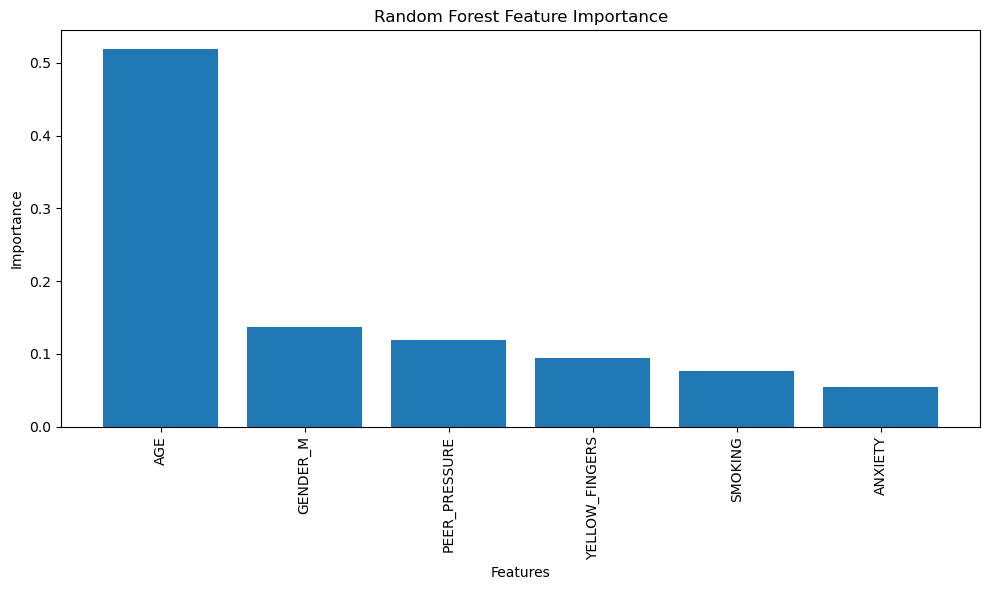

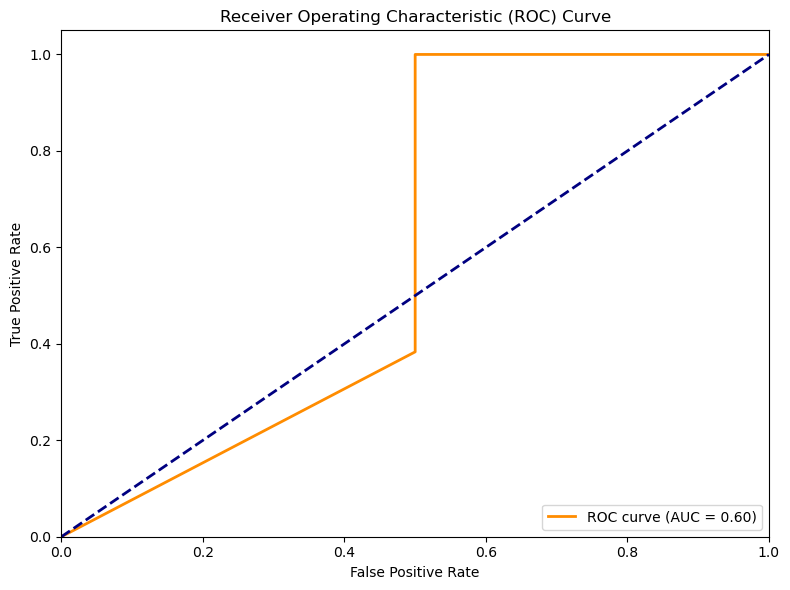

In [34]:
# ... existing code ...

# Select specific columns for the model
selected_columns = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'GENDER']

# Create dummy variables for selected categorical columns
X = pd.get_dummies(df[selected_columns], drop_first=True)
y = df['LUNG_CANCER']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=90)
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

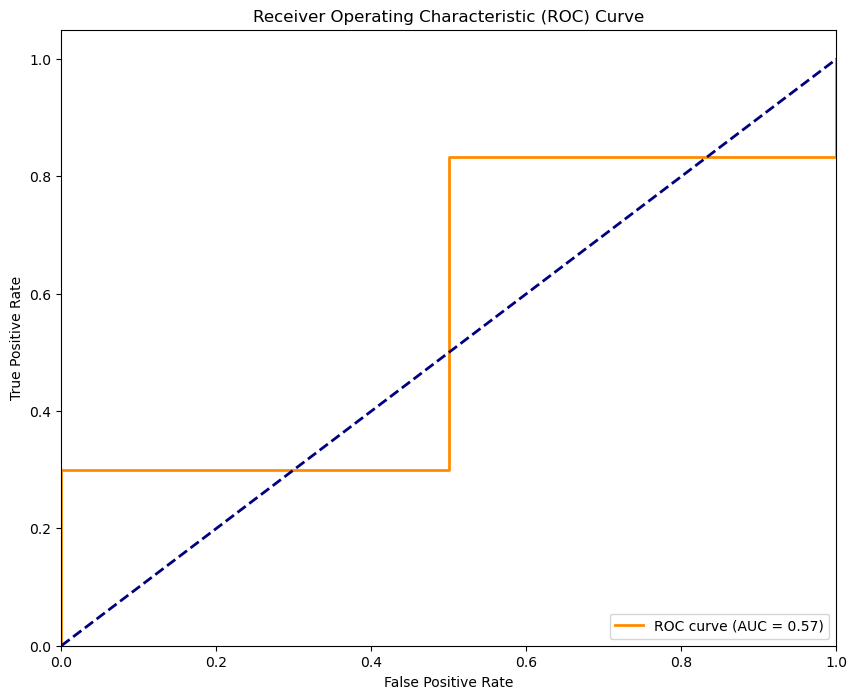

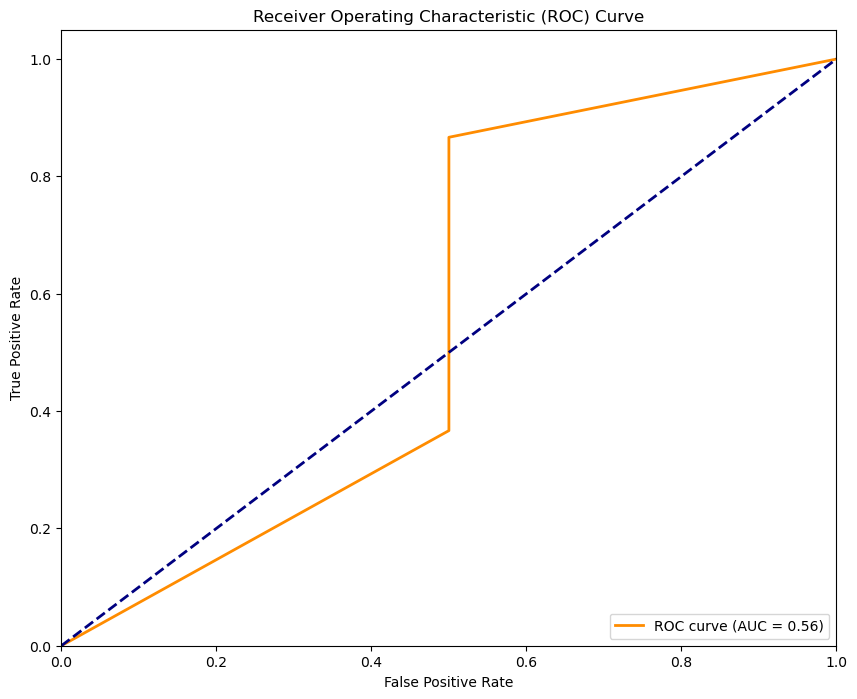

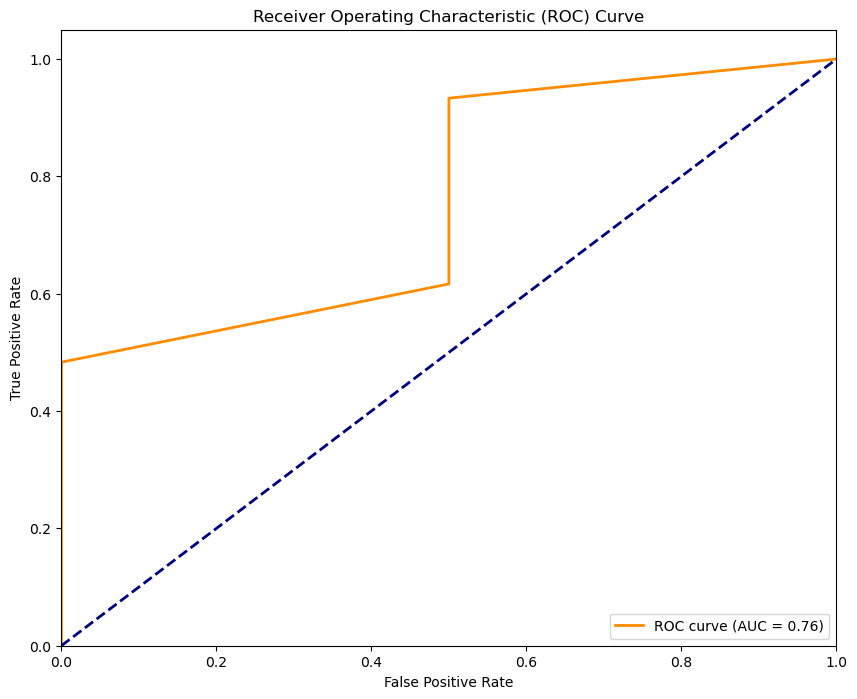

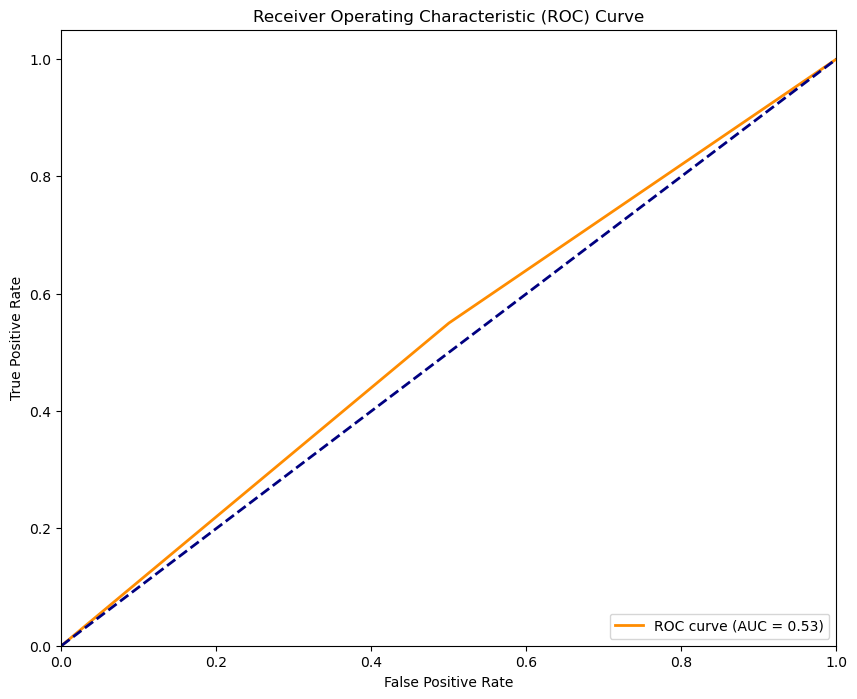

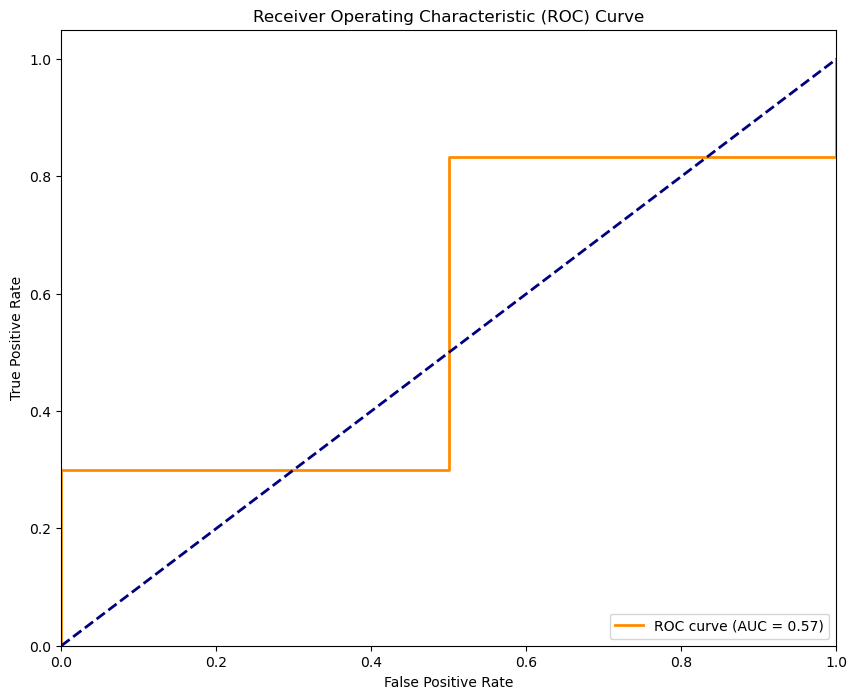

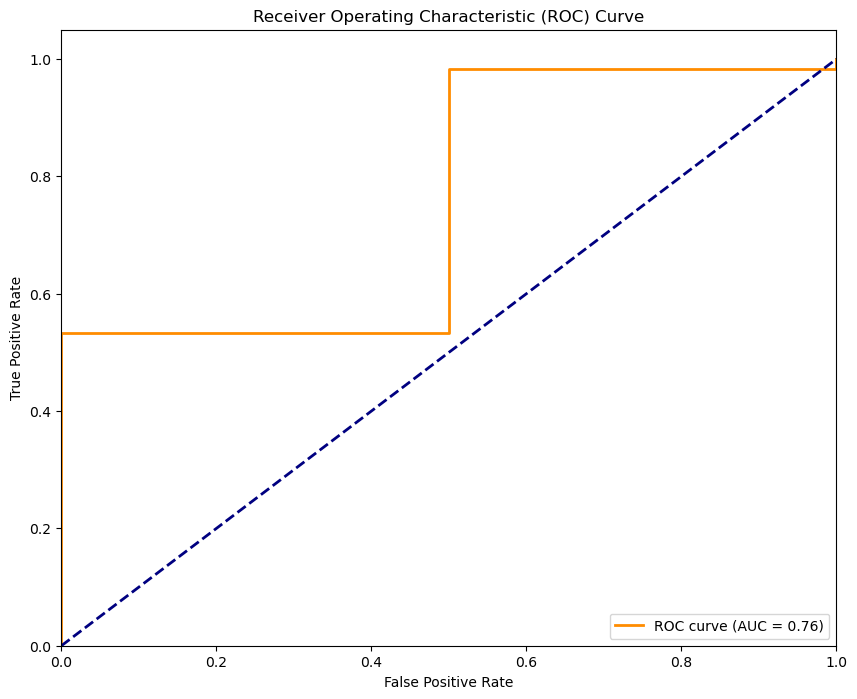

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, widgets
import ipywidgets as widgets

# Load the data
df = pd.read_csv("/Users/bera/Desktop/projects/lung-cancer-prediction/survey_lung_cancer.csv")

# Define all possible columns
all_columns = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 
               'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 
               'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER']

# Function to create and evaluate the model
def create_and_evaluate_model(selected_columns):
    # Create dummy variables for selected categorical columns
    X = pd.get_dummies(df[selected_columns], drop_first=True)
    y = df['LUNG_CANCER']

    # Encode the target variable
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit logistic regression
    logistic_model = LogisticRegression(random_state=42, max_iter=1000)
    logistic_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Function to update the plot
def update_plot(selected_columns):
    plt.figure(figsize=(10, 8))
    
    if not selected_columns:
        plt.text(0.5, 0.5, "Please select at least one variable", ha='center', va='center')
    else:
        fpr, tpr, roc_auc = create_and_evaluate_model(selected_columns)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Create checkboxes for each column
checkboxes = [widgets.Checkbox(value=False, description=col) for col in all_columns]

# Create a button to update the plot
update_button = widgets.Button(description="Update Plot")

# Create a VBox to hold all the widgets
vbox = widgets.VBox([widgets.HBox(checkboxes), update_button])

# Function to handle button click
def on_button_clicked(b):
    selected_columns = [checkbox.description for checkbox in checkboxes if checkbox.value]
    update_plot(selected_columns)

# Attach the function to the button
update_button.on_click(on_button_clicked)

# Display the interactive widgets
display(vbox)